In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 567E-9C80

 Directory of C:\Users\sowik\source\repos\NNVisualiser\data_analysis\projekt1

19.03.2019  14:57    <DIR>          .
19.03.2019  14:57    <DIR>          ..
19.03.2019  14:55    <DIR>          .ipynb_checkpoints
19.03.2019  14:09    <DIR>          classification
19.03.2019  14:46           326ÿ142 data_analysis - gridsearch.ipynb
19.03.2019  10:43           223ÿ829 data_analysis.ipynb
19.03.2019  13:36           280ÿ841 mult.ipynb
19.03.2019  14:42            94ÿ780 multiclassification.ipynb
19.03.2019  14:09    <DIR>          regression
19.03.2019  14:38           188ÿ185 regression.ipynb
19.03.2019  14:50            40ÿ149 Untitled.ipynb
19.03.2019  14:57               722 Untitled1.ipynb
               7 File(s)      1ÿ154ÿ648 bytes
               5 Dir(s)  141ÿ266ÿ755ÿ584 bytes free


In [2]:
import sys,os 
os.chdir('.\..\..')

In [3]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [4]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.train.100.csv")
test = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.test.100.csv")

In [5]:
print(train.x[0])

0.493589159322043


In [6]:
X = train[['x', 'y']].values.T
Xt = test[['x', 'y']].values.T
print(X.shape)
y = train.cls.values.reshape(1, -1)
yt = test.cls.values.reshape(1, -1)
y.shape

(2, 300)


(1, 300)

In [7]:
enc = OneHotEncoder()
Y = enc.fit_transform(train.cls.values.reshape(-1,1))
Yt = enc.fit_transform(test.cls.values.reshape(-1,1))

c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you 

In [8]:
Y.A.shape

(300, 3)

In [9]:
X.shape

(2, 300)

In [10]:
model_builder = nn.SequentialBuilder()
model_builder.add_dense(2, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(13, "relu")
model_builder.add_dense(7, "relu")
model_builder.add_dense(3, "softmax")
model = model_builder.compile(loss = 'categorical_crossentropy')

In [11]:
parameters, costs = model.fit(X, Y.A.T, momentum=0.9, num_epochs=5000, learning_rate=0.05)


Cost after epoch 0: 1.129810
Cost after epoch 1000: 0.176155
Cost after epoch 2000: 0.440234
Cost after epoch 3000: 0.372504
Cost after epoch 4000: 0.068367


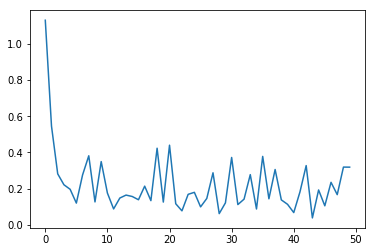

In [32]:
plt.plot(costs)

In [33]:
print(costs[-1])

0.31903533190440375


In [34]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

In [35]:
X.shape

(2, 300)

In [36]:
p = model.predict(X)

In [37]:
pt = model.predict(X)

In [18]:
print(y.T.shape)
print(X.T.shape)

(300, 1)
(300, 2)


In [19]:
indexer = (y.T == 1).reshape(-1,)

In [20]:
X.T[indexer].shape

(100, 2)

In [21]:
X.T[(y.T == 0).reshape(-1,)]

array([], shape=(0, 2), dtype=float64)

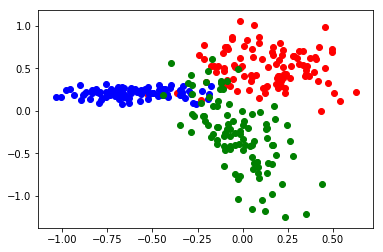

In [22]:
first_class_positions = X.T[(y.T == 1).reshape(-1,)]
second_class_positions = X.T[(y.T == 2).reshape(-1,)]
third_class_positions = X.T[(y.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

In [23]:
first_class_positions = X.T[(predicted_classes.T == 1).reshape(-1,)]
second_class_positions = X.T[(predicted_classes.T == 2).reshape(-1,)]
third_class_positions = X.T[(predicted_classes.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

NameError: name 'predicted_classes' is not defined

In [24]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :].reshape(1, -1), c=y.ravel(), cmap=plt.cm.Spectral)
    
    plt.savefig('multiclass2.jpg')
    plt.show()

In [25]:
X[0, :].shape

(300,)

In [26]:
print(X[0 :].shape)
print(X[1, :].reshape(1, -1).shape)

(2, 300)
(1, 300)


In [27]:
print(X[0 :].size)

print(X[1, :].reshape(1, -1).size)

600
300


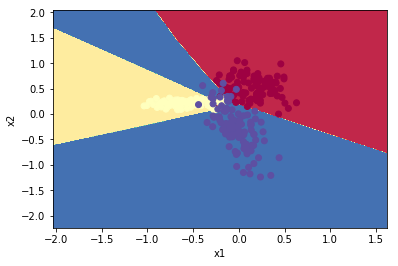

In [28]:
plot_decision_boundary(lambda x: model.predict_classes(x.T), X, y)

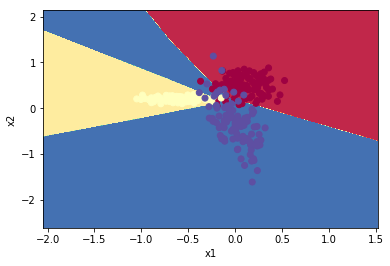

In [29]:
plot_decision_boundary(lambda x: model.predict_classes(x.T), Xt, yt)